# CLASSIFICATION MODEL
Import Libraries needed for classification task

In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic_df = pandas.read_csv('/home/shreemay/Desktop/ML/titanic_data.csv')

In [4]:
#check the head of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df = titanic_df[['Survived','Pclass','Sex','Name','Age','SibSp','Parch','Ticket','Fare','Embarked']]

In [6]:
titanic_df.head()

,Survived,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,1,3,female,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,0,3,male,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S


In [7]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

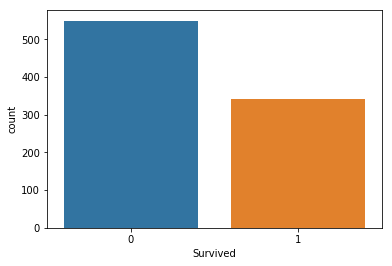

In [8]:
seaborn.countplot(x='Survived',data=titanic_df)


First we will check for any missing value in the dataset

In [9]:
#Check if any feature contains missing value
titanic_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Name        False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool

In [10]:
#Now check the count of null value in each feature
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Name          0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

    Age is a continuous variable.It contains 177 null values.We can replace null values by mean value of non-null values

In [11]:
titanic_df['Age'].fillna((titanic_df['Age'].mean()),inplace=True)

In [12]:
titanic_df.head()

,Survived,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,1,3,female,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,0,3,male,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S


In [13]:
titanic_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Name        False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool

In [14]:
titanic_df.dropna(inplace=True)

In [15]:
titanic_df.head()

,Survived,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C
2,1,3,female,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S
4,0,3,male,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S


In [16]:
titanic_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Name        False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked    False
dtype: bool

In [17]:
#Take dependent and independent variables separating
titanic_df_x = titanic_df[['Pclass','Sex','Name','Age','SibSp','Parch','Ticket','Fare','Embarked']]
titanic_df_y = titanic_df[['Survived']]

We have to perform more engineeering on this dataset 

In [18]:
#Divide the data into training and test set .Train set contains 80% of data and test set contains 20% of data
x_train,x_test,y_train,y_test = train_test_split(titanic_df_x,titanic_df_y,test_size=0.20)

In [19]:
x_train.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
364,3,male,"O'Brien, Mr. Thomas",29.699118,1,0,370365,15.500,Q
149,2,male,"Byles, Rev. Thomas Roussel Davids",42.000000,0,0,244310,13.000,S
583,1,male,"Ross, Mr. John Hugo",36.000000,0,0,13049,40.125,C
341,1,female,"Fortune, Miss. Alice Elizabeth",24.000000,3,2,19950,263.000,S
791,2,male,"Gaskell, Mr. Alfred",16.000000,0,0,239865,26.000,S


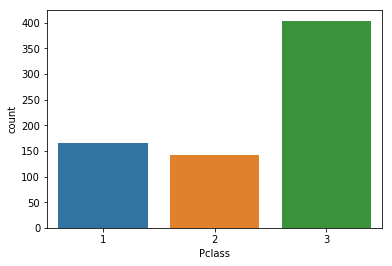

In [20]:
#Check the count of Pclass
seaborn.countplot(x='Pclass',data=x_train)

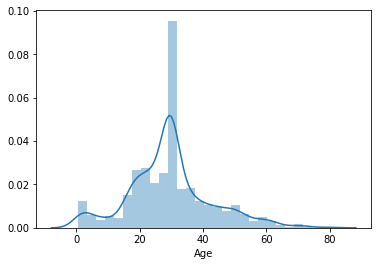

In [21]:
#Check the distribution of age data.It contains peak 
seaborn.distplot(x_train['Age'])

In [22]:
#we will perform z-score normalization on both these 
age_scaler = StandardScaler()
age_scaler.fit(pandas.DataFrame(x_train['Age']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
#transform age
x_train[['Age']] = age_scaler.transform(x_train[['Age']])

In [24]:
x_train[['Age']].head()

,Age
364,0.014515
149,0.954478
583,0.495993
341,-0.420978
791,-1.032292


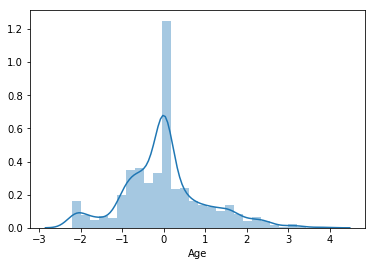

In [25]:
seaborn.distplot(x_train['Age'])

In [26]:
#perform z-score normalization with frame
fare_scaler = StandardScaler

In [27]:
#Change sex featurte  to 0 ,1 values
x_train['Sex'] = x_train['Sex'].map({'female':0,'male':1})

In [28]:
x_train['Sex'].head()

364    1
149    1
583    1
341    0
791    1
Name: Sex, dtype: int64

In [29]:
#Embarked has 3 cato
embarked_encoder = preprocessing.LabelEncoder()
embarked_encoder.fit(pandas.DataFrame(x_train['Embarked']))

LabelEncoder()

In [30]:
embarked_encoder

LabelEncoder()

In [31]:
x_train[['Embarked']]=embarked_encoder.transform(x_train['Embarked'])

In [32]:
x_train[['Embarked']].head()

,Embarked
364,1
149,2
583,0
341,2
791,2


In [33]:
ticket_encoder = preprocessing.LabelEncoder()
ticket_encoder.fit(pandas.DataFrame(x_train['Ticket']))

LabelEncoder()

In [34]:
x_train[['Ticket']] = ticket_encoder.transform(x_train['Ticket'])

In [35]:
x_train[['Ticket']].head()

,Ticket
364,379
149,119
583,52
341,77
791,113


In [36]:
#x_train

In [37]:
ticket_scaler = StandardScaler()
ticket_scaler.fit(pandas.DataFrame(x_train['Ticket']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
x_train[['Ticket']] = ticket_scaler.transform(x_train[['Ticket']])

In [39]:
#x_train

In [40]:
fare_scaler = StandardScaler()
fare_scaler.fit(pandas.DataFrame(x_train['Fare']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
#x_train

In [42]:

embarked_scaler = StandardScaler()
embarked_scaler.fit(pandas.DataFrame(x_train['Embarked']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
x_train.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
364,3,1,"O'Brien, Mr. Thomas",0.014515,1,0,0.596184,15.500,1
149,2,1,"Byles, Rev. Thomas Roussel Davids",0.954478,0,0,-0.971021,13.000,2
583,1,1,"Ross, Mr. John Hugo",0.495993,0,0,-1.374878,40.125,0
341,1,0,"Fortune, Miss. Alice Elizabeth",-0.420978,3,2,-1.224185,263.000,2
791,2,1,"Gaskell, Mr. Alfred",-1.032292,0,0,-1.007187,26.000,2


In [44]:
name_encoder =  preprocessing.LabelEncoder()
name_encoder.fit(pandas.DataFrame(x_train['Name']))

LabelEncoder()

In [45]:
x_train[['Name']] = name_encoder.transform(x_train['Name'])

In [46]:
x_train.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
364,3,1,465,0.014515,1,0,0.596184,15.500,1
149,2,1,96,0.954478,0,0,-0.971021,13.000,2
583,1,1,552,0.495993,0,0,-1.374878,40.125,0
341,1,0,201,-0.420978,3,2,-1.224185,263.000,2
791,2,1,218,-1.032292,0,0,-1.007187,26.000,2


In [47]:
name_scaler = StandardScaler()
name_scaler.fit(pandas.DataFrame(x_train['Name']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
x_train[['Name']] = name_scaler.transform(x_train[['Name']]) 
x_train.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
364,3,1,0.535937,0.014515,1,0,0.596184,15.500,1
149,2,1,-1.261889,0.954478,0,0,-0.971021,13.000,2
583,1,1,0.959815,0.495993,0,0,-1.374878,40.125,0
341,1,0,-0.750312,-0.420978,3,2,-1.224185,263.000,2
791,2,1,-0.667486,-1.032292,0,0,-1.007187,26.000,2


In [49]:
del x_train['Pclass']

In [50]:
x_train.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
364,1,0.535937,0.014515,1,0,0.596184,15.500,1
149,1,-1.261889,0.954478,0,0,-0.971021,13.000,2
583,1,0.959815,0.495993,0,0,-1.374878,40.125,0
341,0,-0.750312,-0.420978,3,2,-1.224185,263.000,2
791,1,-0.667486,-1.032292,0,0,-1.007187,26.000,2


In [51]:
x_train_original = x_train
x_train = x_train.values
y_train = y_train.values

In [52]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
#x_test

def transform_test_data(test_data,age_scaler,fare_scaler,embarked_encoder,name_scaler,name_encoder,enbarked_scaler,ticket_encoder,ticket_scaler):
    test_data['Sex']=test_data['Sex'].map({'female':0,'male':1})
    test_data[['Age']] = age_scaler.transform(test_data[['Age']])
    test_data[['Fare']] = fare_scaler.transform(test_data[['Fare']])
    test_data[['Embarked']] = embarked_encoder.transform(test_data[['Embarked']])
    test_data[['Name']] = name_encoder.transform(test_data[['Name']])
    test_data[['Name']] = name_scaler.transform(test_data[['Name']])
    test_data[['Embarked']] = embarked_scaler.transform(test_data[['Embarked']])
    test_data[['Ticket']] = ticket_encoder.transform(test_data[['Ticket']])
    test_data[['Ticket']] = ticket_scaler.transform(test_data[['Ticket']])
    return test_data

NOTE: first Apply Labelencoder on name and ticket fields 

In [54]:
#x_test

In [55]:
x_test['Sex'] = x_test['Sex'].map({'female':0,'male':1})
#x_test

In [56]:
del x_test['Pclass']

In [57]:
#x_test

In [58]:
name_encoder = preprocessing.LabelEncoder()
name_encoder.fit(pandas.DataFrame(x_test['Name']))

LabelEncoder()

In [59]:
x_test['Name'] = name_encoder.transform(x_test['Name'])

In [60]:
#x_test

In [61]:
name_scaler = StandardScaler()
name_scaler.fit(pandas.DataFrame(x_test['Name']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
x_test[['Name']]=name_scaler.transform(x_test[['Name']])
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
597,1,0.126500,49.000000,0,0,LINE,0.0000,S
485,0,0.379500,29.699118,3,1,4133,25.4667,S
316,0,0.204346,24.000000,1,0,244367,26.0000,S
122,1,0.768731,32.500000,1,0,237736,30.0708,C
675,1,-0.710347,18.000000,0,0,349912,7.7750,S


In [63]:
age_scaler = StandardScaler()
age_scaler.fit(pandas.DataFrame(x_test['Age']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
x_test['Age'] = age_scaler.transform(x_test[['Age']])

In [65]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
597,1,0.126500,1.510016,0,0,LINE,0.0000,S
485,0,0.379500,-0.042690,3,1,4133,25.4667,S
316,0,0.204346,-0.501170,1,0,244367,26.0000,S
122,1,0.768731,0.182633,1,0,237736,30.0708,C
675,1,-0.710347,-0.983855,0,0,349912,7.7750,S


In [66]:
ticket_encoder = preprocessing.LabelEncoder()
ticket_encoder.fit(pandas.DataFrame(x_test['Ticket']))

LabelEncoder()

In [67]:
x_test[['Ticket']] = ticket_encoder.transform(x_test['Ticket'])

In [68]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
597,1,0.126500,1.510016,0,0,137,0.0000,S
485,0,0.379500,-0.042690,3,1,117,25.4667,S
316,0,0.204346,-0.501170,1,0,44,26.0000,S
122,1,0.768731,0.182633,1,0,36,30.0708,C
675,1,-0.710347,-0.983855,0,0,94,7.7750,S


In [69]:
ticket_encoder = StandardScaler()
ticket_encoder.fit(pandas.DataFrame(x_test['Ticket']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
x_test['Ticket'] = ticket_encoder.transform(x_test[['Ticket']])

In [71]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
597,1,0.126500,1.510016,0,0,1.111927,0.0000,S
485,0,0.379500,-0.042690,3,1,0.693574,25.4667,S
316,0,0.204346,-0.501170,1,0,-0.833416,26.0000,S
122,1,0.768731,0.182633,1,0,-1.000758,30.0708,C
675,1,-0.710347,-0.983855,0,0,0.212467,7.7750,S


In [72]:
fare_scaler = StandardScaler()
fare_scaler.fit(pandas.DataFrame(x_test['Fare']))                

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
x_test[['Fare']] = fare_scaler.transform(x_test[['Fare']])

In [74]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
597,1,0.126500,1.510016,0,0,1.111927,-0.816261,S
485,0,0.379500,-0.042690,3,1,0.693574,-0.142968,S
316,0,0.204346,-0.501170,1,0,-0.833416,-0.128869,S
122,1,0.768731,0.182633,1,0,-1.000758,-0.021244,C
675,1,-0.710347,-0.983855,0,0,0.212467,-0.610704,S


In [75]:
embarked_encoder = preprocessing.LabelEncoder()
embarked_encoder.fit(pandas.DataFrame(x_test['Embarked']))

LabelEncoder()

In [76]:
x_test[['Embarked']] = embarked_encoder.transform(x_test['Embarked'])

In [77]:
x_test.head()

,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
597,1,0.126500,1.510016,0,0,1.111927,-0.816261,2
485,0,0.379500,-0.042690,3,1,0.693574,-0.142968,2
316,0,0.204346,-0.501170,1,0,-0.833416,-0.128869,2
122,1,0.768731,0.182633,1,0,-1.000758,-0.021244,0
675,1,-0.710347,-0.983855,0,0,0.212467,-0.610704,2


In [78]:
x_test_original = x_test
x_test = x_test.values
y_test = y_test.values

In [79]:
logistic_regression = LogisticRegression()

In [80]:
logistic_regression.fit(x_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
y_pred = logistic_regression.predict(x_test)

In [82]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

In [83]:
print(accuracy_score(y_test,y_pred))

0.8314606741573034
